In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/final_export.csv


In [2]:
df = pd.read_csv("/kaggle/input/final_export.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,10,11,15,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,PAYMENTTOKENID,MERCHANTID,CURRENCYTYPE,AMOUNT,INVOICEID,TRANSACTIONID,DESCRIPTION,PAYMENTOPTION,PAYMENTOPTIONDESC,INITIALURL,...,COREREFNO,RESERVE1,RESERVE2,TXMERCHANTACCOUNT,TXDIRECTION,IBUSERID,FAILEDREASON,MINISTERY_TYPE,MINISTERY_STATUS,MINISTERY_RESPONSE
0,pTY12P19/J74VJ+B81qrW9S0POA=,3zj8pEw96jSgMxu7PqLioz9Q2jg=,USD,1.0,NaN,NaN,1@DEP/A/5611/LHPP,1,1@DEP/A/5611/LHPP,NaN,...,NaN,NaN,0.0,1.086982e+10,2.0,NaN,NaN,NaN,NaN,NaN
1,q+VwbNG3zyzuQRGAbd9N8lQItgg=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,KHR,100000.0,20170220,561,10@mobile,2,10@mobile,https://www.registeredurl.com/,...,NaN,NaN,0.0,NaN,0.0,XPAYqlcvrEwOh7eO5BKjnD86tQeDVT4=,NaN,NaN,NaN,NaN
2,9MvBfWe+UDngG2njrFkWPBHjTrM=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,KHR,100.0,20170220,561,10@mobile,1,mobile,https://www.registeredurl.com/,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,aKyH1DkBosaB3NhdmE3JL+PLhNA=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,KHR,100000.0,20170220,10000,10@mobile,1,mobile,https://www.registeredurl.com/,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,uRD7TqhbxsiNGZ8h1lcSrdRqoRk=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,USD,500.0,8721862,1552439236902,1@Motorola156,2,1@Motorola156,NaN,...,FT1907205YCYLDGR,USD,0.0,NaN,0.0,XPAY1NQucr7eO5609lDHhkKBa3yV8lk=,NaN,NaN,NaN,NaN


In [4]:
"""
transform df for 1st quarter of 2019 ie 8JAN`19 to 28MAR`19
"""
df = df[:349]

In [5]:
df.columns

Index(['PAYMENTTOKENID', 'MERCHANTID', 'CURRENCYTYPE', 'AMOUNT', 'INVOICEID',
       'TRANSACTIONID', 'DESCRIPTION', 'PAYMENTOPTION', 'PAYMENTOPTIONDESC',
       'INITIALURL', 'ACCTYPE', 'AUTHRESULT', 'EXPIRYTIME', 'IPADDRESS',
       'USERID', 'TRANSACTIONRESULT', 'AMOUNTDEDUCTED', 'TRANSACTIONTIME',
       'ERRORMESSAGE', 'CALLBACKRESULT', 'CLOSESTATUS', 'ACCOUNTNO',
       'ACCOUNTNOOFMERCHANTORBANK', 'TRANSCREFNUM', 'FEECURRENCY', 'FEEAMOUNT',
       'CREDITCURRENCYTYPE', 'FEETYPE', 'EXCHANGERATE', 'COREREFNO',
       'RESERVE1', 'RESERVE2', 'TXMERCHANTACCOUNT', 'TXDIRECTION', 'IBUSERID',
       'FAILEDREASON', 'MINISTERY_TYPE', 'MINISTERY_STATUS',
       'MINISTERY_RESPONSE'],
      dtype='object')

In [6]:
df["EXCHANGERATE"].unique()

array([   0.    , 4096.    , 4084.    ,   32.825 ,   32.5119,  124.6   ])

In [7]:
cols = ['PAYMENTTOKENID', 'MERCHANTID', 'CURRENCYTYPE', 'AMOUNT','PAYMENTOPTION', 'ACCTYPE', 'AUTHRESULT',
        'CLOSESTATUS', 'AMOUNTDEDUCTED','ERRORMESSAGE','FEEAMOUNT','FEETYPE','EXCHANGERATE']

In [8]:
data = df[cols]
data.shape

(349, 13)

In [9]:
data.columns

Index(['PAYMENTTOKENID', 'MERCHANTID', 'CURRENCYTYPE', 'AMOUNT',
       'PAYMENTOPTION', 'ACCTYPE', 'AUTHRESULT', 'CLOSESTATUS',
       'AMOUNTDEDUCTED', 'ERRORMESSAGE', 'FEEAMOUNT', 'FEETYPE',
       'EXCHANGERATE'],
      dtype='object')

In [10]:
cols_as_id = ['PAYMENTTOKENID', 'MERCHANTID']

In [11]:
for i in cols_as_id:
    print(data[i].nunique())

349
9


In [12]:
for i in data.columns:
    print(i,data[i].isna().sum())

PAYMENTTOKENID 0
MERCHANTID 0
CURRENCYTYPE 0
AMOUNT 0
PAYMENTOPTION 0
ACCTYPE 0
AUTHRESULT 0
CLOSESTATUS 0
AMOUNTDEDUCTED 0
ERRORMESSAGE 0
FEEAMOUNT 0
FEETYPE 0
EXCHANGERATE 0


In [13]:
"""
res = df.groupby(["PAYMENTTOKENID","MERCHANTID"])["AMOUNT"].mean()
data = data.merge(res,on=["PAYMENTTOKENID","MERCHANTID"],how="left",suffixes=['','_mean'])
"""

'\nres = df.groupby(["PAYMENTTOKENID","MERCHANTID"])["AMOUNT"].mean()\ndata = data.merge(res,on=["PAYMENTTOKENID","MERCHANTID"],how="left",suffixes=[\'\',\'_mean\'])\n'

In [14]:
data["CURRENCYTYPE"] = data["CURRENCYTYPE"].replace(['USD', 'KHR'],[1,2])
data["PAYMENTOPTION"] = data["PAYMENTOPTION"].replace(['1', '2'],[1,2])
data["ACCTYPE"] = data["ACCTYPE"].replace(['2', '1'],[2,1])
data["AUTHRESULT"] = data["AUTHRESULT"].replace(['66', '99', '0'],[1,1,2])
data["CLOSESTATUS"] = data["CLOSESTATUS"].replace(['1', '2', '-1'],[0,1,0])
data["ERRORMESSAGE"] = data["ERRORMESSAGE"].replace(['PENDING', 'SUCCESS', 'CANCEL', 'EXPIRED', 'FAILED'],
                                                    [1,2,-1,-1,-1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["MERCHANTID"] = le.fit_transform(data["MERCHANTID"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
data.dtypes

PAYMENTTOKENID     object
MERCHANTID          int64
CURRENCYTYPE        int64
AMOUNT            float64
PAYMENTOPTION       int64
ACCTYPE             int64
AUTHRESULT          int64
CLOSESTATUS         int64
AMOUNTDEDUCTED    float64
ERRORMESSAGE        int64
FEEAMOUNT          object
FEETYPE           float64
EXCHANGERATE      float64
dtype: object

In [17]:
del data["PAYMENTTOKENID"]

In [18]:
Y = data["AMOUNT"]
del data["AMOUNT"]
X = data

In [19]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=33)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
m1 = LinearRegression()
ypred = m1.fit(Xtrain,ytrain).predict(Xtest)
print(np.sqrt(mse(ypred,ytest)))

9850618.254312366


In [21]:
sub = pd.DataFrame()
sub["ytest"] = ytest
sub["ypred"] = ypred

In [22]:
sub

,ytest,ypred
101,1.257500e+02,11568.252479
220,1.300000e+05,333375.672820
300,2.000000e+03,-40537.021652
342,2.000000e+03,33580.098301
4,5.000000e+02,-32072.762370
...,...,...
169,5.007500e+02,-10865.941121
277,9.000000e+00,67082.615316
215,1.000000e+08,633973.706816
270,1.000000e+01,44356.811529


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [25]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, \
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [26]:
opt_params = rf_random.best_params_

In [27]:
final_rf = RandomForestRegressor(**opt_params)
ypred = final_rf.fit(Xtrain,ytrain).predict(Xtest)
print(np.sqrt(mse(ypred,ytest)))

9605109.228237838


KMeans Clustering for merchants.

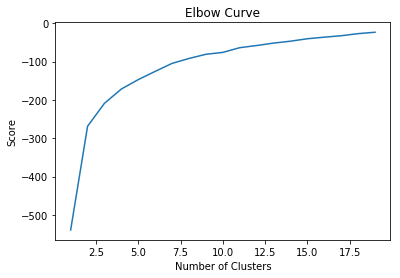

In [28]:
import pylab as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
minmax = MinMaxScaler()
x = data.values
z = minmax.fit_transform(x)
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(z).score(z) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [29]:
# K means Clustering for Behaviour 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(z)

In [30]:
y_kmeans.shape

(349,)

In [31]:
data["cluster"] = y_kmeans

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data.groupby(["MERCHANTID"])["cluster"].agg(lambda x:x.value_counts().index[0])

MERCHANTID
0    0
1    2
2    0
3    1
4    0
5    1
6    2
7    0
8    0
Name: cluster, dtype: int32

In [33]:
for i in range(0,9):
    print("Merchant - ",i)
    print(data[data["MERCHANTID"]==i]["cluster"])

Merchant -  0
215    0
234    0
235    0
267    2
269    2
271    0
278    0
Name: cluster, dtype: int32
Merchant -  1
346    2
347    2
348    2
Name: cluster, dtype: int32
Merchant -  2
195    1
196    2
197    0
198    0
199    0
211    0
212    0
213    0
214    0
261    1
277    1
Name: cluster, dtype: int32
Merchant -  3
0      0
6      0
7      0
8      0
9      0
      ..
272    2
273    2
274    2
275    1
276    0
Name: cluster, Length: 241, dtype: int32
Merchant -  4
92     0
93     0
98     0
99     0
100    1
308    0
309    1
310    1
Name: cluster, dtype: int32
Merchant -  5
303    1
304    0
305    0
306    1
307    2
Name: cluster, dtype: int32
Merchant -  6
1      2
2      0
3      0
4      1
5      2
109    1
157    0
172    1
173    0
175    0
282    0
283    2
284    1
285    0
286    2
287    1
288    0
289    2
290    2
291    1
292    1
293    2
294    2
295    2
296    2
297    2
298    2
301    0
302    2
311    1
312    1
313    1
Name: cluster, dtype: int32


In [34]:
data["AMOUNT"] = Y
data.groupby(["MERCHANTID"])["AMOUNT"].mean()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


MERCHANTID
0    1.871729e+07
1    1.000000e+00
2    9.818182e+00
3    1.267503e+04
4    2.000000e+05
5    2.000000e+03
6    1.993969e+04
7    1.000000e+01
8    2.581538e+05
Name: AMOUNT, dtype: float64